In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [6]:
qc = QuantumCircuit(1)
initial_state = [0, 1] # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialization operation to the 0th qubit
qc.draw('text')

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [7]:
backend = Aer.get_backend('statevector_simulator')

In [8]:
result = execute(qc, backend).result()

In [9]:
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


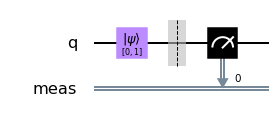

In [10]:
qc.measure_all()
qc.draw('mpl')

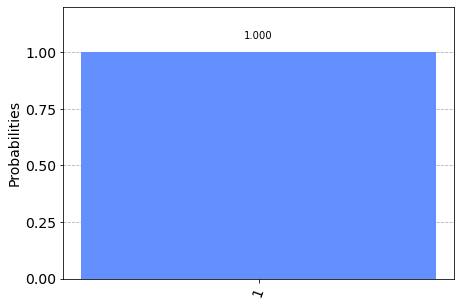

In [14]:
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## initialize like Hadamard gate

In [15]:
initial_state = [1/sqrt(2),1/sqrt(2)] # Define state |q>

In [16]:
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0) # Apply initialization operation to the 0th qubit
state = execute(qc, backend).result().get_statevector()
print(state)

[0.70710678+0.j 0.70710678+0.j]


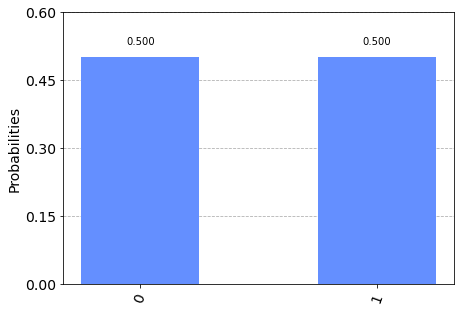

In [17]:
results = execute(qc, backend).result().get_counts()
plot_histogram(results)

## Create a state vector having 1/3 probability of measuring |0>

In [18]:
initial_state = [sqrt(1/3),sqrt(2/3)] # Define state |q>

In [19]:
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0) # Apply initialization operation to the 0th qubit
state = execute(qc, backend).result().get_statevector()
print(state)

[0.57735027+0.j 0.81649658+0.j]


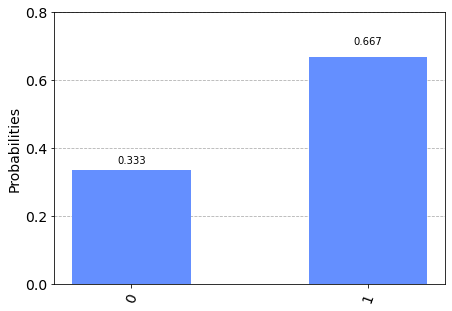

In [20]:
results = execute(qc, backend).result().get_counts()
plot_histogram(results)

In [21]:
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

## Observer Effect (Collapse)

In [27]:
qc = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('text')

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [28]:
state = execute(qc, backend).result().get_statevector()
print("Qubit state = " + str(state))

Qubit state = [0.        +0.70710678j 0.70710678+0.j        ]


In [29]:
qc.measure_all()
qc.draw('text')

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

In [30]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+1.j 0.+0.j]


## Bloch Sphere

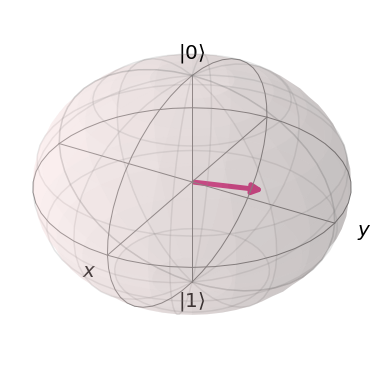

In [40]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/3, pi/3, 1] # Theta, Phi, Radius
plot_bloch_vector_spherical(coords)

In [42]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

[Theta, Phi]
1. |0> = [0,0]
2. |1> = [pi/2,0]
3. 1/sqrt(2)(|0>+|1>) = [pi/2,0]
4. 1/sqrt(2)(|0>-|1>) = [pi/2, pi]
5. 1/sqrt(2)(|0>-i|1>) = [pi/2, 3pi/2]
6. 1/sqrt(2)[i 1] = [pi/2, pi/2]